In [53]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [54]:
# Carregando os dados
dataset = pd.read_csv('Live_20210128.csv', delimiter=',', low_memory=False)

In [55]:
# Visualizando as primeiras linhas
dataset.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [56]:
# Dimensôes do dataset em linhas e colunas respectivamente
dataset.shape

(7050, 16)

In [57]:
# Info geral do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [58]:
# Verificando tipo dos campos
dataset.dtypes

status_id             int64
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [59]:
dataset.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [60]:
# Eliminando os valores vazios
dataset = dataset.drop(columns=["Column1", "Column2", "Column3", "Column4"])

In [61]:
# Checando dataset sem os valores vazios
dataset.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
5,6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
6,7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
7,8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
8,9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0
9,10,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0


In [62]:
# Usando LabelEncoder para transformar valores categóricos em numéricos, pois é pré-requisito que todos os valores sejam numéricos para que algoritmo K-Means seja capaz de realizar os cálculos.
label_encoder = LabelEncoder()
dataset['status_type']= label_encoder.fit_transform(dataset['status_type'])
dataset['status_published']= label_encoder.fit_transform(dataset['status_published'])

In [63]:
dataset

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,3949,529,512,262,432,92,3,1,1,0
1,2,1,3917,150,0,0,150,0,0,0,0,0
2,3,3,3921,227,236,57,204,21,1,1,0,0
3,4,1,3920,111,0,0,111,0,0,0,0,0
4,5,1,3832,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,1,6691,89,0,0,89,0,0,0,0,0
7046,7047,1,6676,16,0,0,14,1,0,1,0,0
7047,7048,1,6643,2,0,0,1,1,0,0,0,0
7048,7049,1,6625,351,12,22,349,2,0,0,0,0


In [64]:
# Dados normalizados para que todas as colunas possuam o mesmo peso no cálculo da distância.
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [65]:
dataset_scaled

array([[-1.73180514,  1.37428794,  0.24546202, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-1.73131378, -0.74810636,  0.22937444, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-1.73082242,  1.37428794,  0.23138539, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [ 1.73082242, -0.74810636,  1.59983469, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.73131378, -0.74810636,  1.59078543, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.73180514, -0.74810636,  1.50934208, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [66]:
# Definindo X como os dados após o pré-processamento
X = dataset.values

In [67]:
# Usando o Kmeans com variedade de clusters, de 2 até 10 em cada iteração
intervalo_num_clusters = range(2, 11)

In [68]:
# Loop para testar diferentes números de clusters
indices_calinski = []
for num_clusters in intervalo_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
    rótulos = kmeans.labels_
    índice_calinski = calinski_harabasz_score(X, rótulos)
    indices_calinski.append(índice_calinski)
    print(f"Número de Clusters: {num_clusters}, Índice Calinski-Harabasz: {índice_calinski}")

Número de Clusters: 2, Índice Calinski-Harabasz: 3681.7849982666758
Número de Clusters: 3, Índice Calinski-Harabasz: 4205.444638237102
Número de Clusters: 4, Índice Calinski-Harabasz: 4543.9189975770805
Número de Clusters: 5, Índice Calinski-Harabasz: 4128.258943433565
Número de Clusters: 6, Índice Calinski-Harabasz: 4167.361384567887
Número de Clusters: 7, Índice Calinski-Harabasz: 4121.8542624070105
Número de Clusters: 8, Índice Calinski-Harabasz: 4066.5734993841456
Número de Clusters: 9, Índice Calinski-Harabasz: 3945.4656832495325
Número de Clusters: 10, Índice Calinski-Harabasz: 3974.3271340748643


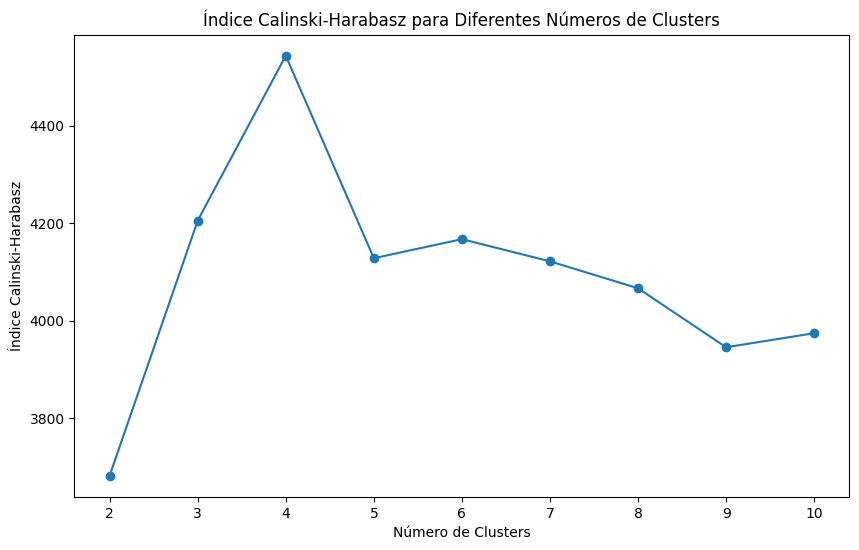

In [69]:
# Plotando o gráfico do índice Calinski-Harabasz em função do número de clusters
plt.figure(figsize=(10, 6))
plt.plot(intervalo_num_clusters, indices_calinski, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice Calinski-Harabasz')
plt.title('Índice Calinski-Harabasz para Diferentes Números de Clusters')
plt.show()

In [70]:
# Utilizando KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

In [71]:
# Reduzindo a dimensionalidade para plotar o gráfico 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

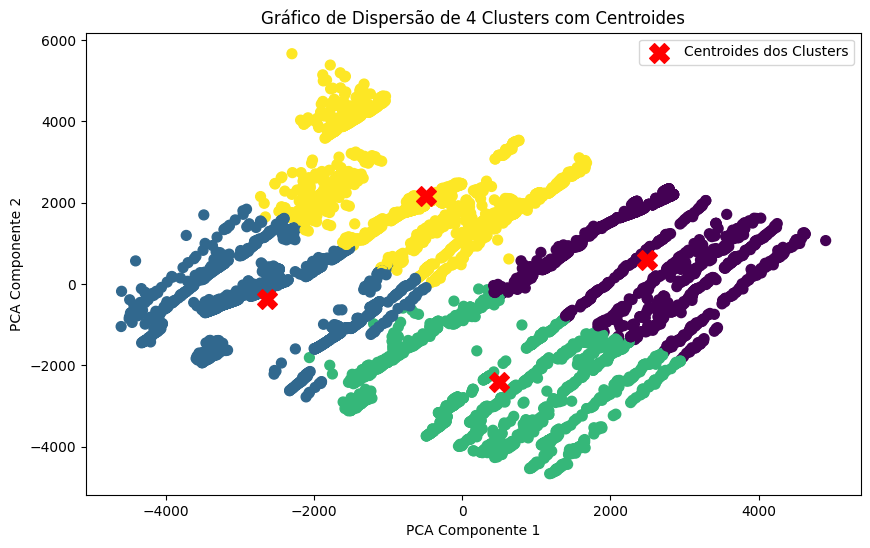

In [73]:
# Plotando os pontos coloridos de acordo com os clusters
plt.figure(figsize=(10, 6))

# Plot dos pontos dos clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)

# Plot dos centroides dos clusters e transformando os centroides usando o PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroides dos Clusters')

plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.title('Gráfico de Dispersão de 4 Clusters com Centroides')
plt.legend()
plt.show()